# Project: Predicting Employee Churn

**Objective:** Build a model to predict which employees will most likely leave an organization.
    
**Tools Used:** Python, Pandas, scikit-learn, XG Boost, Matplotlib, Seaborn

**Skills Demonstrated:** Exploratory Data Analysis, Data Preprocessing, Feature Engineering, Clustering, Model Building, Model Validation, Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score, auc

from xgboost import XGBClassifier

## A. Exploratory Data Analysis & Data Preprocessing

### 1. Overview of Data

In [2]:
df = pd.read_csv('employee_data.csv')
df_x = df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [4]:
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


In [5]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


### 2. Explore Distribution of Numerical Features

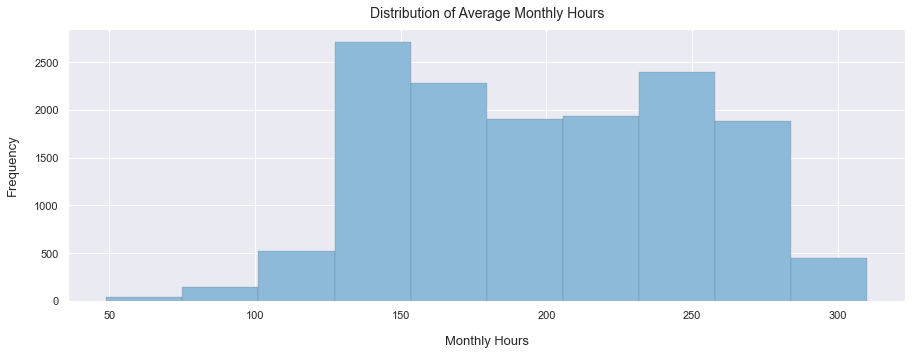

In [6]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 5))
plt.hist(df['avg_monthly_hrs'], edgecolor='black', linewidth=0.1, color='#8EBAD9')
plt.title('Distribution of Average Monthly Hours', y=1.02, fontsize=14)
plt.ylabel('Frequency', fontsize=13, labelpad=15)
plt.xlabel('Monthly Hours', fontsize=13, labelpad=15)
plt.show()

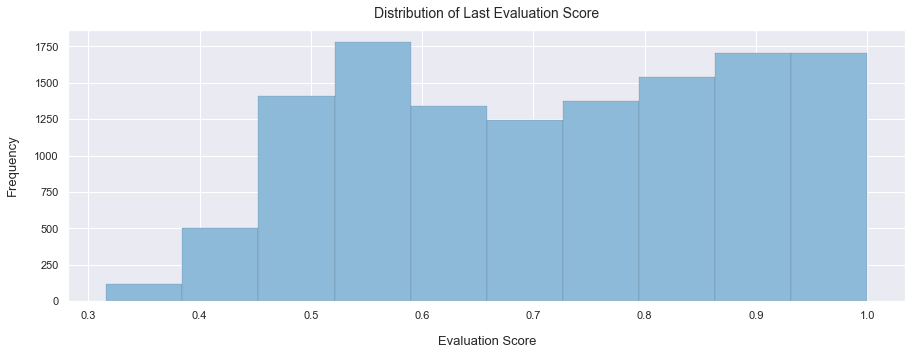

In [7]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 5))
plt.hist(df['last_evaluation'], edgecolor='black', linewidth=0.1, color='#8EBAD9')
plt.title('Distribution of Last Evaluation Score', y=1.02, fontsize=14)
plt.ylabel('Frequency', fontsize=13, labelpad=15)
plt.xlabel('Evaluation Score', fontsize=13, labelpad=15)
plt.show()

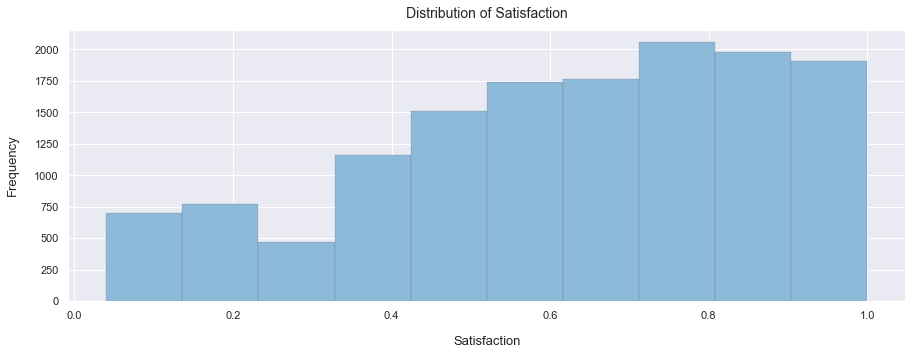

In [8]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 5))
plt.hist(df['satisfaction'], edgecolor='black', linewidth=0.1, color='#8EBAD9')
plt.title('Distribution of Satisfaction', y=1.02, fontsize=14)
plt.ylabel('Frequency', fontsize=13, labelpad=15)
plt.xlabel('Satisfaction', fontsize=13, labelpad=15)
plt.show()

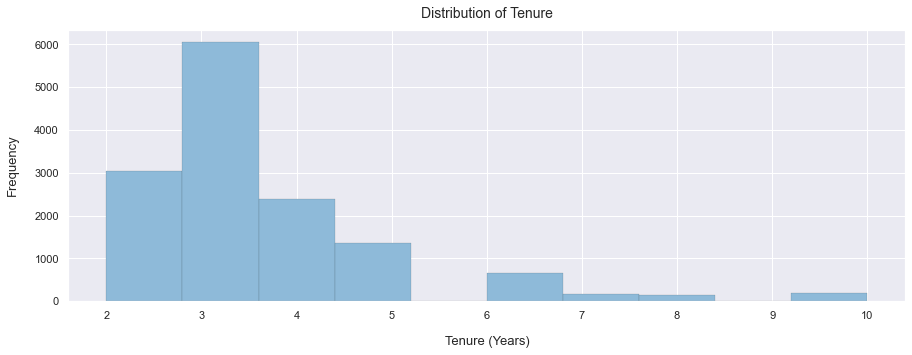

In [9]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 5))
plt.hist(df['tenure'], edgecolor='black', linewidth=0.1, color='#8EBAD9')
plt.title('Distribution of Tenure', y=1.02, fontsize=14)
plt.ylabel('Frequency', fontsize=13, labelpad=15)
plt.xlabel('Tenure (Years)', fontsize=13, labelpad=15)
plt.show()

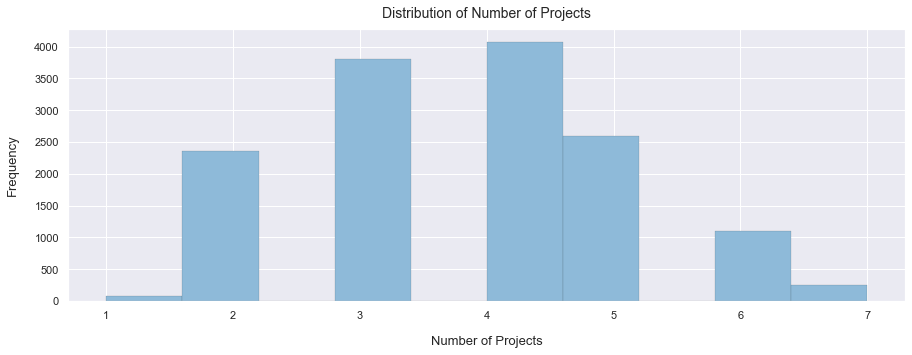

In [10]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 5))
plt.hist(df['n_projects'], edgecolor='black', linewidth=0.1, color='#8EBAD9')
plt.title('Distribution of Number of Projects', y=1.02, fontsize=14)
plt.ylabel('Frequency', fontsize=13, labelpad=15)
plt.xlabel('Number of Projects', fontsize=13, labelpad=15)
plt.show()

### 3. Explore and Replace Nulls for Numerical Features

In [11]:
df.isna().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [12]:
# Replace nulls in filed_complaint and recently_promoted with 0.
df['filed_complaint'].fillna(0, inplace=True)
df['recently_promoted'].fillna(0, inplace=True)

# Add new feature for employees without evaluations and then replace nulls with 0.
df['no_evaluation'] = df['last_evaluation'].isnull().astype(int)
df['last_evaluation'].fillna(0, inplace=True)

### 4. Explore Correlation Between Features

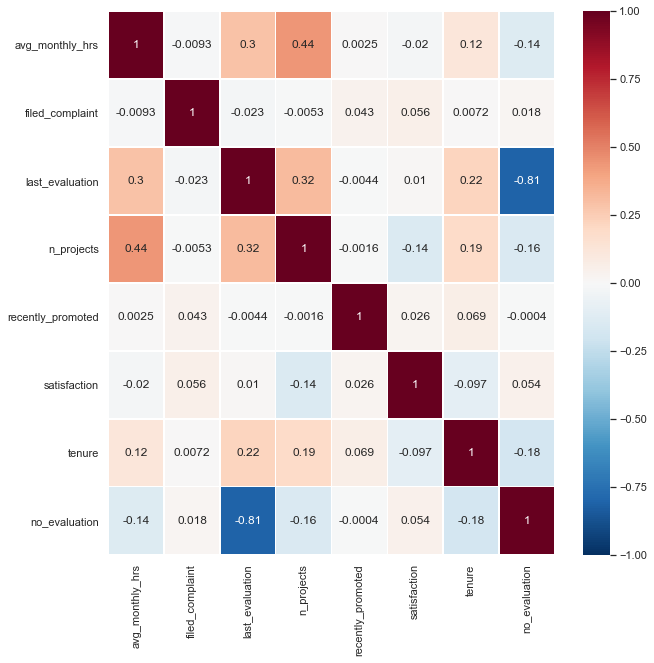

In [13]:
df['filed_complaint'].fillna(0, inplace=True)
df['recently_promoted'].fillna(0, inplace=True)

sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", linewidths=0.5)
plt.show()

### 5. Explore Categorical Features

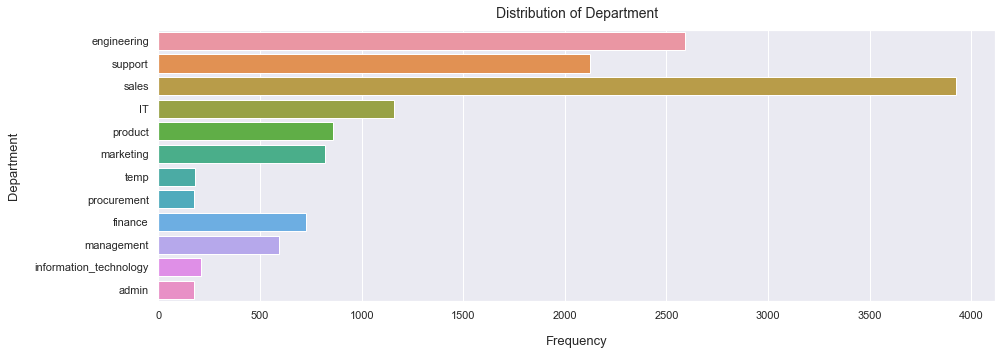

In [14]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 5))
sns.countplot(data=df, y='department')
plt.title('Distribution of Department', y=1.02, fontsize=14)
plt.ylabel('Department', fontsize=13, labelpad=15)
plt.xlabel('Frequency', fontsize=13, labelpad=15)
plt.show()

**Observation:** There are a number of employees with a department value of *temp*.  Tempororay employees are not applicable to the churn model, so I will remove them.

In [15]:
df = df[df['department'] != 'temp']

**Observation:** IT and Information Technology are likely the same department, so I will merge the two.

In [16]:
df['department'].replace('information_technology', 'IT', inplace=True)

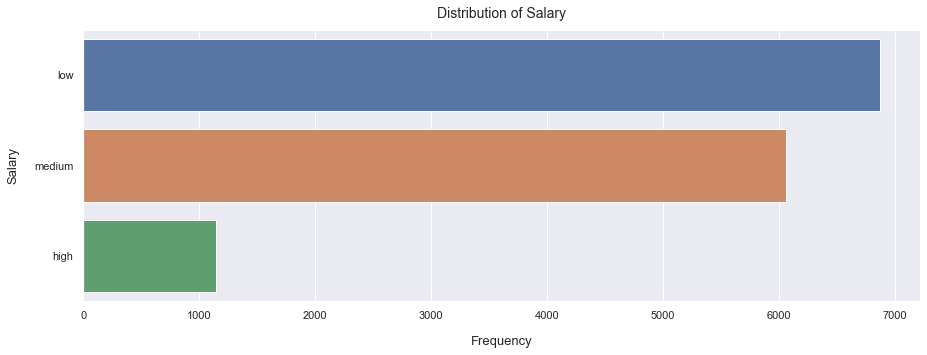

In [17]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 5))
sns.countplot(data=df, y='salary')
plt.title('Distribution of Salary', y=1.02, fontsize=14)
plt.ylabel('Salary', fontsize=13, labelpad=15)
plt.xlabel('Frequency', fontsize=13, labelpad=15)
plt.show()

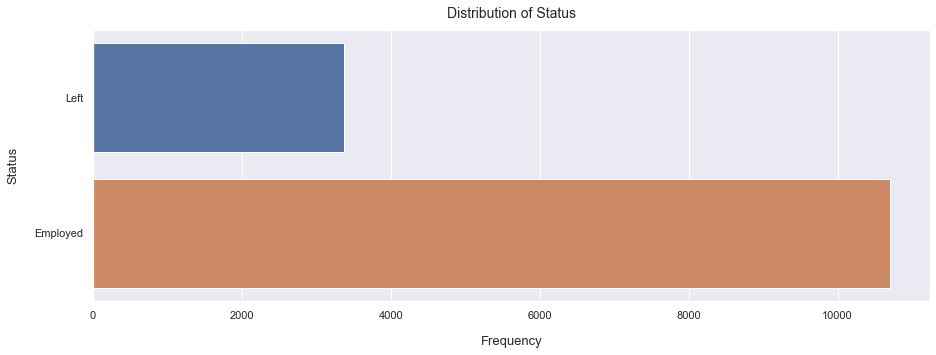

In [18]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 5))
sns.countplot(data=df, y='status')
plt.title('Distribution of Status', y=1.02, fontsize=14)
plt.ylabel('Status', fontsize=13, labelpad=15)
plt.xlabel('Frequency', fontsize=13, labelpad=15)
plt.show()

**Observation:** The status feature represents the label for our model.  The above plot demonstrates that the feature is imbalanced, with significantly more observations having a status of Employed.

### 6. Explore and Replace Nulls for Categorical Features

In [19]:
df.isna().sum()

avg_monthly_hrs        0
department           709
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
no_evaluation          0
dtype: int64

In [20]:
# Replace nulls in department with an unknown indicator.
df['department'].fillna('unknown', inplace=True)

### 7. Encode Categorical Features

In [21]:
# One hot encode the department and salary features.
df = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

# Convert the status feature to binary.
df['status'] = pd.get_dummies(df.status).Left

In [22]:
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,no_evaluation,department_admin,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,department_unknown,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,1


### 8. Explore Differences Between Employed and Left

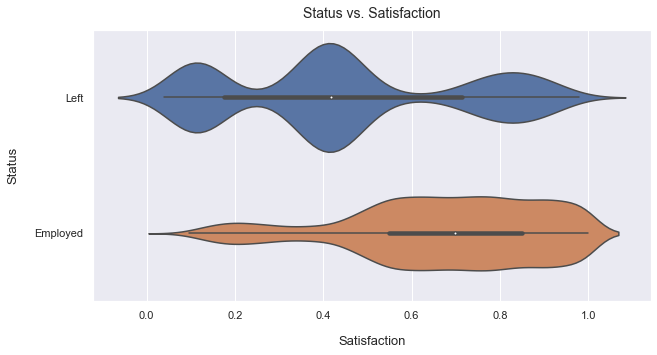

In [23]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='status', x='satisfaction', data=df_x)
plt.title('Status vs. Satisfaction', y=1.02, fontsize=14)
plt.ylabel('Status', fontsize=13, labelpad=15)
plt.xlabel('Satisfaction', fontsize=13, labelpad=15)
plt.show()

**Observation:** There is a group of former employees who were quite satisfied with their jobs, although most had satisfaction ratings under 0.5.  Most current employees have a satisfaction rating of greater than 0.5.

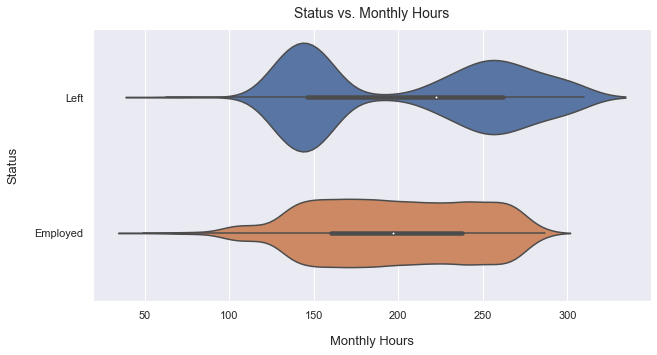

In [24]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='status', x='avg_monthly_hrs', data=df_x)
plt.title('Status vs. Monthly Hours', y=1.02, fontsize=14)
plt.ylabel('Status', fontsize=13, labelpad=15)
plt.xlabel('Monthly Hours', fontsize=13, labelpad=15)
plt.show()

**Observation:** A majority of former employees had either a low number of monthly hours or a high number of monthly hours.  Anecdotally, employees with low satisfaction often work the minimum amount of hours possible.

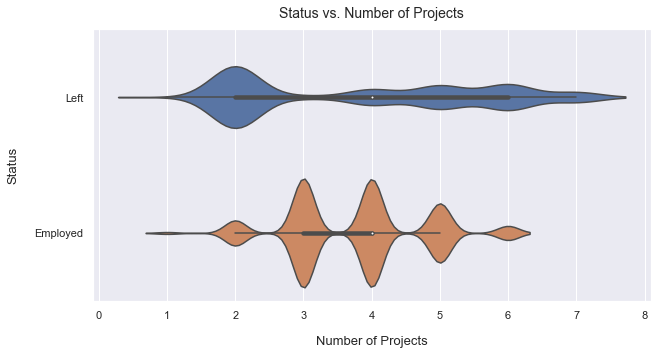

In [25]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='status', x='n_projects', data=df_x)
plt.title('Status vs. Number of Projects', y=1.02, fontsize=14)
plt.ylabel('Status', fontsize=13, labelpad=15)
plt.xlabel('Number of Projects', fontsize=13, labelpad=15)
plt.show()

**Observation:** Former employees either worked on a low or a high number of projects.  The low number of projects could be related to a short tenure.

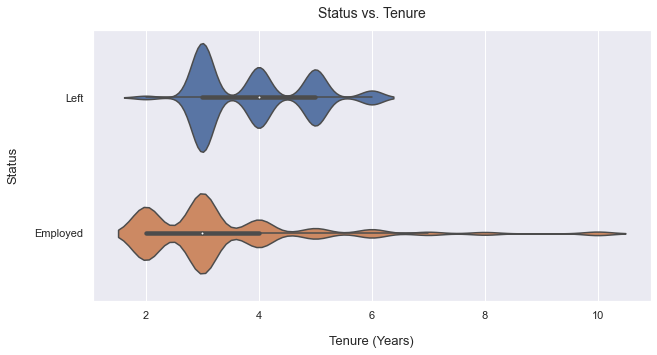

In [26]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='status', x='tenure', data=df_x)
plt.title('Status vs. Tenure', y=1.02, fontsize=14)
plt.ylabel('Status', fontsize=13, labelpad=15)
plt.xlabel('Tenure (Years)', fontsize=13, labelpad=15)
plt.show()

**Observation:** Former employees started to churn after 3 years of employment and did not make it past 6 years.

## B. Feature Engineering

### 1. Explore Characteristics of Former Employees

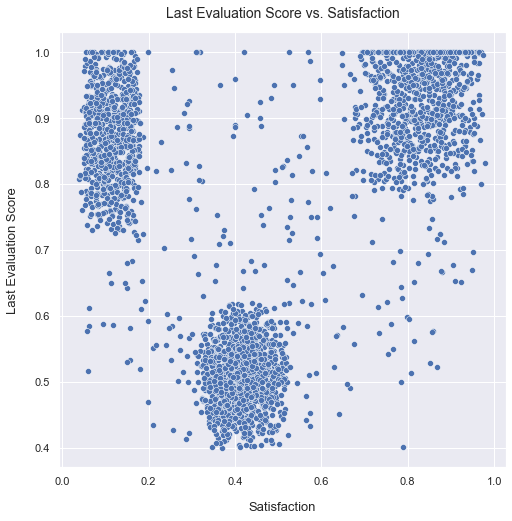

In [27]:
# Plot last evaluation score vs. satisfaction for former employees.
plt.figure(figsize=(8, 8))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=df_x[df_x['status'] =='Left'])
plt.title('Last Evaluation Score vs. Satisfaction', y=1.02, fontsize=14)
plt.ylabel('Last Evaluation Score', fontsize=13, labelpad=15)
plt.xlabel('Satisfaction', fontsize=13, labelpad=15)
plt.show()

**Observation:** There are 3 obvious clusters in the above plot: 1) high-performers (evaluation > 0.8 and satisfaction > 0.7), 2) unhappy (satisfaction < 0.2), and 3) poor-performers (evaluation < 0.6).

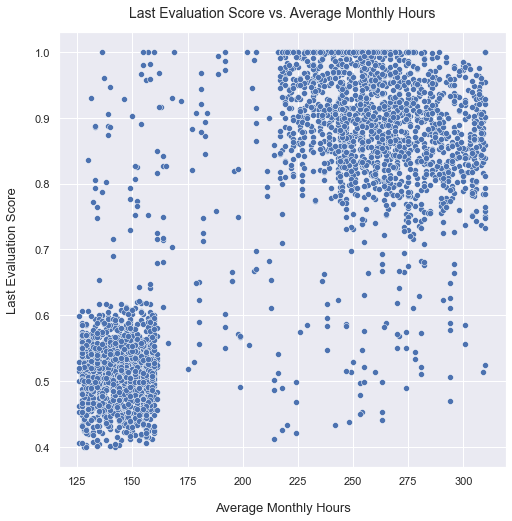

In [28]:
# Plot last evaluation score vs. average monthly hours for former employees.
plt.figure(figsize=(8, 8))
sns.scatterplot(x='avg_monthly_hrs', y='last_evaluation', data=df_x[df_x['status'] =='Left'])
plt.title('Last Evaluation Score vs. Average Monthly Hours', y=1.02, fontsize=14)
plt.ylabel('Last Evaluation Score', fontsize=13, labelpad=15)
plt.xlabel('Average Monthly Hours', fontsize=13, labelpad=15)
plt.show()

**Observation:** There are 2 obvious clusters in the above plot: 1) hard-workers (evaluation > 0.7 and average monthly hours > 215), and 2) slackers (evaluation < 0.6 and average monthly hours < 160).

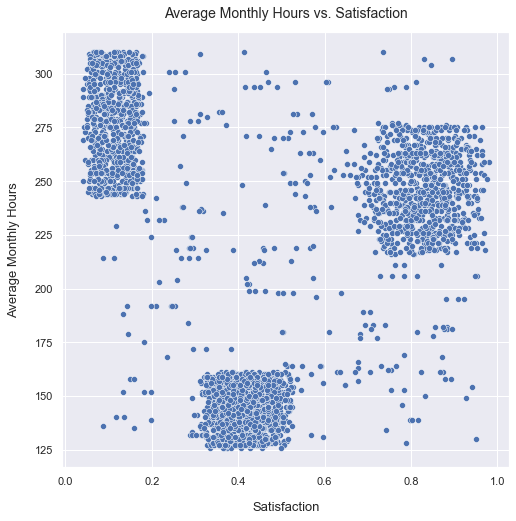

In [29]:
# Plot last evaluation score vs. average monthly hours for former employees.
plt.figure(figsize=(8, 8))
sns.scatterplot(x='satisfaction', y='avg_monthly_hrs', data=df_x[df_x['status'] =='Left'])
plt.title('Average Monthly Hours vs. Satisfaction', y=1.02, fontsize=14)
plt.ylabel('Average Monthly Hours', fontsize=13, labelpad=15)
plt.xlabel('Satisfaction', fontsize=13, labelpad=15)
plt.show()

**Observation:** There are 3 obvious clusters in the above plot: 1) overworked (average monthly hours > 245 and satisfaction < 0.2), 2) daily grinders (average monthly hours < 165), and 3) loving it (average monthly hours > 215 and satisfaction > 0.7).

### 2. Engineer New Features to Represent Clusters

In [30]:
df['poorperformer'] = ((df['last_evaluation'] < 0.6) & (df['no_evaluation'] == 0)).astype(int)
df['unhappy'] = (df['satisfaction'] < 0.2).astype(int)
df['highperformer'] = ((df['last_evaluation'] > 0.8) & (df['satisfaction'] > 0.7)).astype(int)
df['hardworker'] = ((df['avg_monthly_hrs'] > 215) & (df['last_evaluation'] > 0.7)).astype(int)
df['slacker'] = ((df['avg_monthly_hrs'] < 160) & (df['last_evaluation'] < 0.6) & (df['no_evaluation'] == 0)).astype(int)
df['lovingit'] = ((df['avg_monthly_hrs'] > 210) & (df['satisfaction'] > 0.7)).astype(int)
df['dailygrinder'] = (df['avg_monthly_hrs'] < 165).astype(int)
df['overworked'] = ((df['avg_monthly_hrs'] > 245) & (df['satisfaction'] < 0.2)).astype(int)

In [31]:
# Display proportion of employers in each cluster.
df[['poorperformer', 'unhappy', 'highperformer', 'hardworker', 'slacker', 'lovingit', 'dailygrinder', 'overworked']].mean().sort_values(ascending=False).reset_index(name='proportion')

,index,proportion
0,dailygrinder,0.311345
1,poorperformer,0.285257
2,hardworker,0.270330
3,lovingit,0.226685
4,highperformer,0.177069
5,slacker,0.135343
6,unhappy,0.092195
7,overworked,0.064970


## C. Build Classification Model

In [32]:
X = df.drop('status', axis=1)
y = df['status']

# Split into train and test data sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Instantiate XGB classifier.
model = XGBClassifier()

# Define evaluation procedure.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Evaluate the model.
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# Fit the model. 
model.fit(X_train, y_train)

XGBClassifier()

## D. Evaluate XGB Classifier Results

In [34]:
# Validate the classifier using the test set.
y_pred = model.predict(X_test)

# Display a confusion matrix to evaluate results.
print(confusion_matrix(y_test, y_pred))

[[2115   26]
 [  53  620]]


In [35]:
# Display classification report. 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2141
           1       0.96      0.92      0.94       673

    accuracy                           0.97      2814
   macro avg       0.97      0.95      0.96      2814
weighted avg       0.97      0.97      0.97      2814



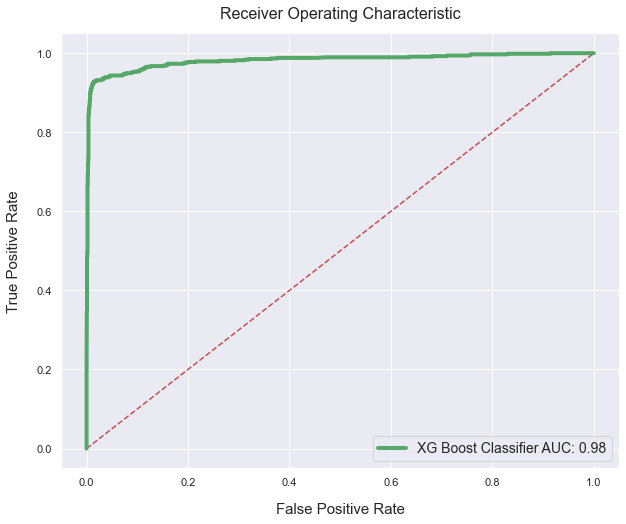

In [36]:
# Calculate metrics and plot ROC-AUC. 
probs = model.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0,1], 'r--')
label = 'XG Boost Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c='g', label=label, linewidth=4)
plt.xlabel('False Positive Rate', fontsize=15, labelpad=15)
plt.ylabel('True Positive Rate', fontsize=15, labelpad=15)
plt.title('Receiver Operating Characteristic', y=1.02, fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.show()

**Observation:** Out of 2,814 employees in the test set, the algorithm correctly classified 620 employees as having left the organization (true positives), while incorrectly classifying 26 (type I error).  It also correctly classified 2,115 current employees (true negatives), while incorrectly classifying 53 (type II error).  This is a highly accurate predictive model and could be used to predict which employees are likely to leave the organization and therefore introduce measures to prevent this and reduce turnover.

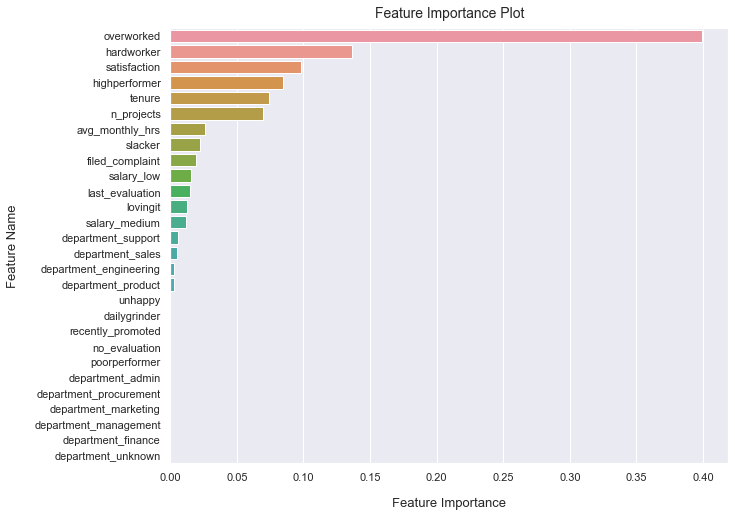

In [37]:
#Plot feature importance.
def plot_feature_importance(importance, names):

    # Create arrays from feature importance and feature names.
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DataFrame using a Dictionary.
    data = {'feature_names':feature_names, 'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in order of decreasing feature importance.
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    # Display the plot.
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title('Feature Importance Plot', y=1.01, fontsize=14)
    plt.xlabel('Feature Importance', fontsize=13, labelpad=15)
    plt.ylabel('Feature Name', fontsize=13, labelpad=15)

plot_feature_importance(model.feature_importances_, X_train.columns)

**Observation:** It should not really come as a surprise that overworked employees are likely to leave an organization.